# 연구과제 풀이

## #01. 기본 준비

### [1] 패키지 가져오기

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Intel SKlearn 하드웨어 가속 패치 설정
import sys
if sys.platform == 'win32':
    from sklearnex import patch_sklearn
    patch_sklearn()

from helper.util import *
from helper.plot import *
from helper.analysis import *
from helper.classification import *

from sklearn.linear_model import SGDClassifier

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


### [2] 데이터 가져오기

In [2]:
origin = my_read_excel("https://data.hossam.kr/mldata/winequality.xlsx", categories=['type', 'quality'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   type                  6497 non-null   category
 1   fixed acidity         6487 non-null   float64 
 2   volatile acidity      6489 non-null   float64 
 3   citric acid           6494 non-null   float64 
 4   residual sugar        6495 non-null   float64 
 5   chlorides             6495 non-null   float64 
 6   free sulfur dioxide   6497 non-null   float64 
 7   total sulfur dioxide  6497 non-null   float64 
 8   density               6497 non-null   float64 
 9   pH                    6488 non-null   float64 
 10  sulphates             6493 non-null   float64 
 11  alcohol               6497 non-null   float64 
 12  quality               6497 non-null   category
dtypes: category(2), float64(11)
memory usage: 571.6 KB
None

데이터프레임 상위 5개 행
+----+--------+-----------------+---

> 종속변수인 `quality`의 데이터 불균형이 심해 `좋음`과 `나쁨`으로 구분하여 분석할 필요가 있어 보임
>
> 퀄리티의 범위가 `1~10`이었으므로 `5`이하인 경우 나쁨, `5`초과인 경우 좋음으로 분류할 예정

## #02. 데이터 확인 및 전처리

### [1] 데이터 분포 확인

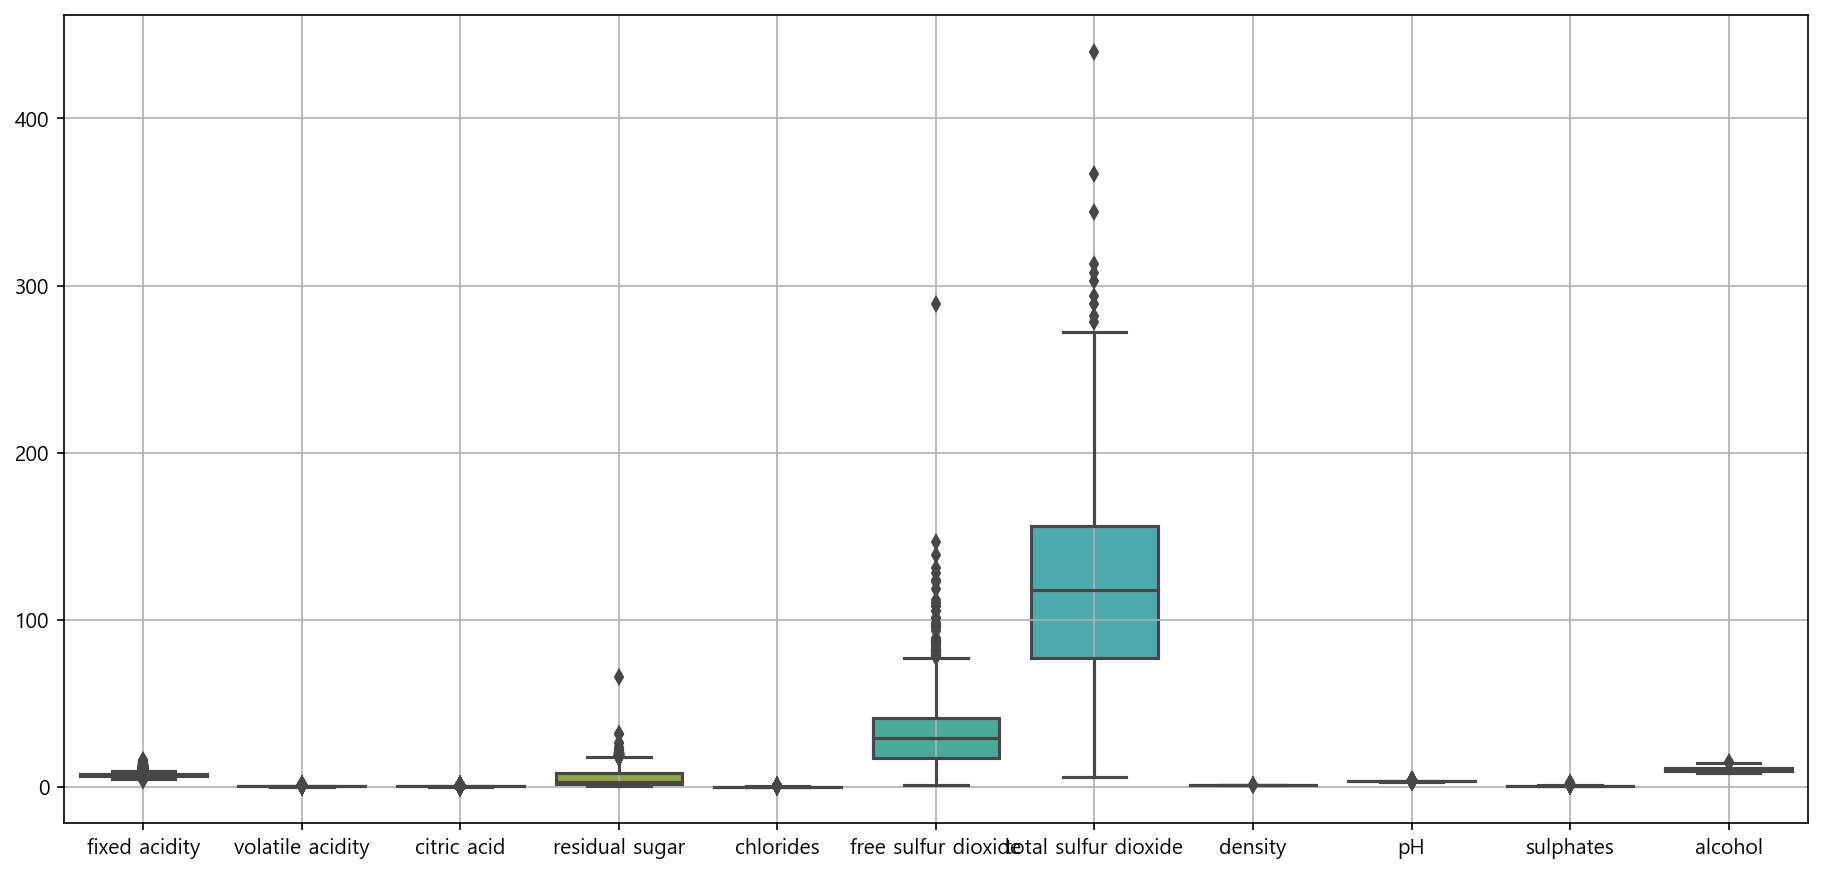

In [3]:
my_boxplot(origin, figsize=(15, 7))

> 스케일링도 필요해 보이며 이상치 역시 상당히 많이 존재한다. 이상치에 대한 삭제 혹은 대체가 필요해 보인다.

### [2] 데이터 스케일링

In [4]:
df1 = my_standard_scaler(origin)
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,-0.167030,-0.423303,0.284180,3.206483,-0.315173,0.815565,0.959976,2.102214,-1.358722,-0.545791,-1.418558,white,6
1,-0.706883,-0.241083,0.146489,-0.808012,-0.200996,-0.931107,0.287618,-0.232332,0.507693,-0.276979,-0.831615,white,6
2,0.681310,-0.362563,0.559560,0.305958,-0.172452,-0.029599,-0.331660,0.134525,0.258838,-0.612994,-0.328521,white,6
3,-0.012786,-0.666262,0.008799,0.642251,0.055902,0.928254,1.243074,0.301278,-0.176659,-0.881807,-0.496219,white,6
4,-0.012786,-0.666262,0.008799,0.642251,0.055902,0.928254,1.243074,0.301278,-0.176659,-0.881807,-0.496219,white,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,-0.784004,1.581115,-1.643483,-0.723939,0.969318,0.083090,-1.269422,0.067824,1.440901,0.327849,0.006875,red,5
6493,-1.015370,1.277415,-1.505793,-0.681902,0.170079,0.477500,-1.145567,0.141195,1.876398,NaN,0.593818,red,6
6494,-0.706883,1.034456,-1.299258,-0.660884,0.569698,-0.085943,-1.340197,0.347969,1.254259,1.470302,0.426120,red,6
6495,-1.015370,1.854445,-1.368103,-0.723939,0.541154,0.083090,-1.269422,0.257923,2.187467,1.201490,-0.244672,red,5


### [2] 종속변수에 대한 `좋음`, `나쁨` 파생 변수 생성

In [5]:
df2 = df1.copy()
df2['quality'] = df2['quality'].astype('int')
df2['target'] = df2['quality'].apply(lambda x:0 if x<=5 else 1)
df2.drop('quality', axis=1, inplace=True)
df2['target'].value_counts()

1    4113
0    2384
Name: target, dtype: int64

### [3] `type` 변수에 대한 라벨링

In [6]:
df3 = my_labelling(df2, 'type')
df3

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,target
0,-0.167030,-0.423303,0.284180,3.206483,-0.315173,0.815565,0.959976,2.102214,-1.358722,-0.545791,-1.418558,1,1
1,-0.706883,-0.241083,0.146489,-0.808012,-0.200996,-0.931107,0.287618,-0.232332,0.507693,-0.276979,-0.831615,1,1
2,0.681310,-0.362563,0.559560,0.305958,-0.172452,-0.029599,-0.331660,0.134525,0.258838,-0.612994,-0.328521,1,1
3,-0.012786,-0.666262,0.008799,0.642251,0.055902,0.928254,1.243074,0.301278,-0.176659,-0.881807,-0.496219,1,1
4,-0.012786,-0.666262,0.008799,0.642251,0.055902,0.928254,1.243074,0.301278,-0.176659,-0.881807,-0.496219,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,-0.784004,1.581115,-1.643483,-0.723939,0.969318,0.083090,-1.269422,0.067824,1.440901,0.327849,0.006875,0,0
6493,-1.015370,1.277415,-1.505793,-0.681902,0.170079,0.477500,-1.145567,0.141195,1.876398,NaN,0.593818,0,1
6494,-0.706883,1.034456,-1.299258,-0.660884,0.569698,-0.085943,-1.340197,0.347969,1.254259,1.470302,0.426120,0,1
6495,-1.015370,1.854445,-1.368103,-0.723939,0.541154,0.083090,-1.269422,0.257923,2.187467,1.201490,-0.244672,0,0


### [4] 결측치 확인

In [7]:
df3.isna().sum()

fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
type                     0
target                   0
dtype: int64

### #03. 상황별 분석 모형

#### [1] 결측치와 이상치를 모두 제거하고 수행

In [8]:
df4 = my_replace_outliner_to_nan(df3).dropna()
df4

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,target
1,-0.706883,-0.241083,0.146489,-0.808012,-0.200996,-0.931107,0.287618,-0.232332,0.507693,-0.276979,-0.831615,1.0,1.0
2,0.681310,-0.362563,0.559560,0.305958,-0.172452,-0.029599,-0.331660,0.134525,0.258838,-0.612994,-0.328521,1.0,1.0
3,-0.012786,-0.666262,0.008799,0.642251,0.055902,0.928254,1.243074,0.301278,-0.176659,-0.881807,-0.496219,1.0,1.0
4,-0.012786,-0.666262,0.008799,0.642251,0.055902,0.928254,1.243074,0.301278,-0.176659,-0.881807,-0.496219,1.0,1.0
5,0.681310,-0.362563,0.559560,0.305958,-0.172452,-0.029599,-0.331660,0.134525,0.258838,-0.612994,-0.328521,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4891,-1.169614,-0.787742,0.008799,-0.955140,-0.514983,0.421155,0.092988,-1.319563,0.134410,-0.478588,0.090724,1.0,1.0
4893,-0.784004,-0.787742,-0.197736,-0.808012,-0.486439,-0.367664,-0.420128,-1.186161,0.321051,-0.209776,0.593818,1.0,1.0
4894,-0.475517,-0.119603,0.284180,0.537159,-0.258085,1.491697,0.924588,0.067824,-0.425515,-0.478588,-0.747766,1.0,0.0
4896,-1.323857,-0.301823,-0.128891,-0.913104,-0.971691,-0.593041,-0.101642,-2.003251,0.756548,-1.016213,1.935402,1.0,1.0


In [9]:
x_train, x_test, y_train, y_test = my_train_test_split(df4, yname='target')
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3450, 12), (863, 12), (3450,), (863,))

In [10]:
%%time
my_classification(x_train, y_train, x_test, y_test)

LogisticRegression의 n_jobs 설정됨
LogisticRegression의 random_state 설정됨
LogisticRegression {'penalty': ['l1', 'l2', 'elasticnet'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [1000]}
KNeighborsClassifier의 n_jobs 설정됨
KNeighborsClassifier {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
SVC의 n_jobs 설정됨
SVC의 random_state 설정됨
SVC {'C': [0.1, 1, 10], 'kernel': ['rbf', 'poly', 'sigmoid'], 'degree': [2, 3, 4, 5]}
GaussianNB {'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]}
DecisionTreeClassifier의 random_state 설정됨
DecisionTreeClassifier {'criterion': ['gini', 'entropy']}
SGDClassifier의 n_jobs 설정됨
SGDClassifier의 random_state 설정됨
SGDClassifier의 early_stopping 설정됨
SGDClassifier {'loss': ['hinge', 'log', 'modified_huber'], 'penalty': ['l2', 'l1', 'elasticnet'], 'alpha': [0.0001, 0.001, 0.01, 0.1], 'max_iter': [1000, 2000, 3000, 4000, 5000], 'learning_rate': ['optimal', 'constant', 'invscaling', 'adaptive'], 'eta0': [0.01, 0.1, 0.5]}


KeyboardInterrupt: 